# ３種類のワイン分類


説明変数（特徴量）は13個

Alcohol<br>
Malic acid<br>
Ash<br>
Alcalinity of ash<br>
Magnesium<br>
Total phenols<br>
Flavanoids<br>
Nonflavanoid phenols<br>
Proanthocyanins<br>
Color intensity<br>
Hue<br>
OD280/OD315 of diluted wines<br>
Proline

## 全体の流れ

#### データの読み込み
#### 問題1 データの確認（何件ワインのデータがあるか。）
#### 問題2 相関行列の可視化
#### 問題3 データの分割
#### 問題4 標準化
#### 問題5 モデル作成
#### 問題6 テストデータで正解率の算出

# データの読み込み

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# warning非表示
import warnings
# すべての警告を表示させない設定
warnings.simplefilter('ignore')

In [14]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data , columns=wine.feature_names)

target = pd.DataFrame(wine.target, columns=['target'])

df = pd.concat([df, target], axis=1)
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


# 【問題1 データの確認（何件ワインのデータがあるか。）】

In [11]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
wine.data.shape

(178, 13)

# 【問題2 相関行列の出力】

ワインの種類を分類するにあたり、どの特徴量が重要なのか

dfに対して、相関係数を出力する関数を利用しましょう。

今回は
X = df[["proline", 'color_intensity']] を利用

In [10]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [18]:
X = df[["proline", 'color_intensity']]

In [19]:
y = df.target.values

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# 【問題3 データの分割】

In [21]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, y,  test_size = 0.25, random_state=5)

In [22]:
x_train.shape

(133, 13)

In [23]:
x_test.shape

(45, 13)

# 【問題4 標準化】

In [51]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(x_train)
print("平均", X_std.mean())
print("標準偏差", X_std.std())
# トレーニングデータで用いたscを元にtransform


平均 5.034209666316499e-16
標準偏差 1.0


# 【問題5 モデル作成】

In [70]:
# ロジスティック回帰でモデル作成
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

# 【問題6 テストデータで正解率の算出】

In [71]:
# テストデータでモデルの正解率の算出
len(x_test)
pred = model.predict(x_test)
pred

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       2])

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [73]:
y_test

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 0,
       2])

In [75]:
accuracy_score(y_test, pred)

0.8888888888888888

In [74]:
cm = confusion_matrix(y_test, pred)
cm

array([[18,  1,  0],
       [ 1, 12,  1],
       [ 0,  2, 10]])

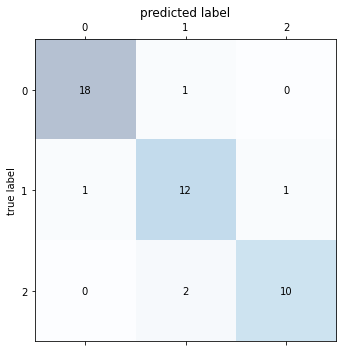

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.title('predicted label')
plt.ylabel('true label')
plt.tight_layout() # ラベルが重ならないように自動調整
plt.show()

In [80]:
print("正解率", accuracy_score(y_test,pred))

正解率 0.8888888888888888


In [81]:
# !pip install mlxtend
!pip install mlxtend

In [82]:
from mlxtend.plotting import plot_decision_regions

ValueError: Filler values must be provided when X has more than 2 training features.

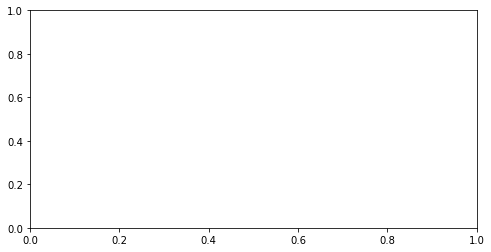

In [85]:
# 訓練データの可視化
plt.figure(figsize= (8, 4)) # サイズの調整
plot_decision_regions(X_train, y_train, model)

In [11]:
# テストデータの可視化
plt.figure(figsize= (8, 4)) # サイズの調整
plot_decision_regions(X_test_std, y_test, model)